In [6]:
from google.colab import files
uploaded = files.upload()


Saving titanic3.xls to titanic3.xls



## Exploratory Data Analysis (EDA)

We begin with an in-depth look at the dataset to understand patterns, missing values, and potential correlations between features.
This step helps in deciding which transformations and preprocessing techniques are required later in the pipeline.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('titanic3.xls')

#show the first 5 rows of the dataframe
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
print(df.info())  # Summary of columns, data types, and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [9]:
print(df.describe())  # Count, mean, std, min, max, quartiles


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [10]:
print(df.describe(include=['object']))  # Summary of categorical columns


                        name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       939          186        3   28   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64  


In [11]:
print(df.isnull().sum())  # Count missing values per column


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64



## Data Preprocessing

Preprocessing is crucial for ensuring a high-quality dataset. The following steps are performed:
- **Handling Missing Values**: Imputing missing values based on logical inferences.
- **Feature Transformation**: Converting categorical variables for better model compatibility.
- **Feature Selection**: Removing irrelevant columns to improve model efficiency.


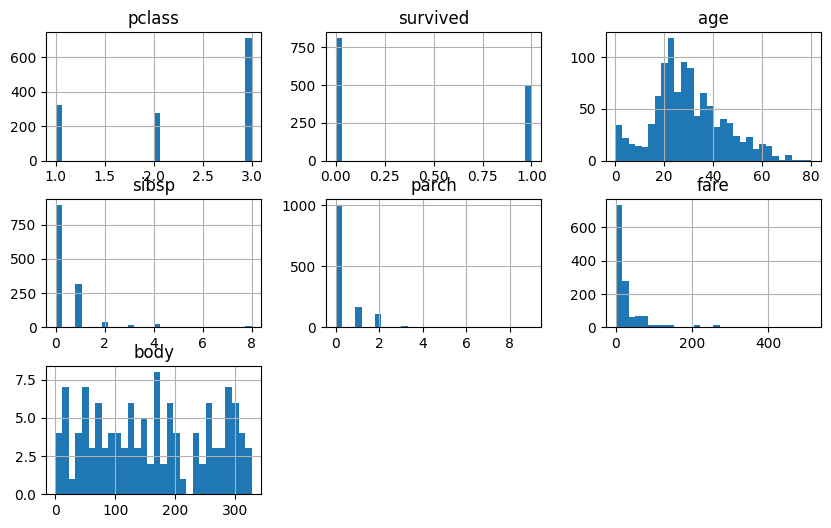

In [12]:
df.hist(figsize=(10, 6), bins=30)
plt.show()


<ipython-input-13-ba21ffa3a836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm', edgecolor='black')
<ipython-input-13-ba21ffa3a836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm', edgecolor='black')
<ipython-input-13-ba21ffa3a836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='coolwarm', edgecolor='black')
<ipython-input-13-ba21ffa3a836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

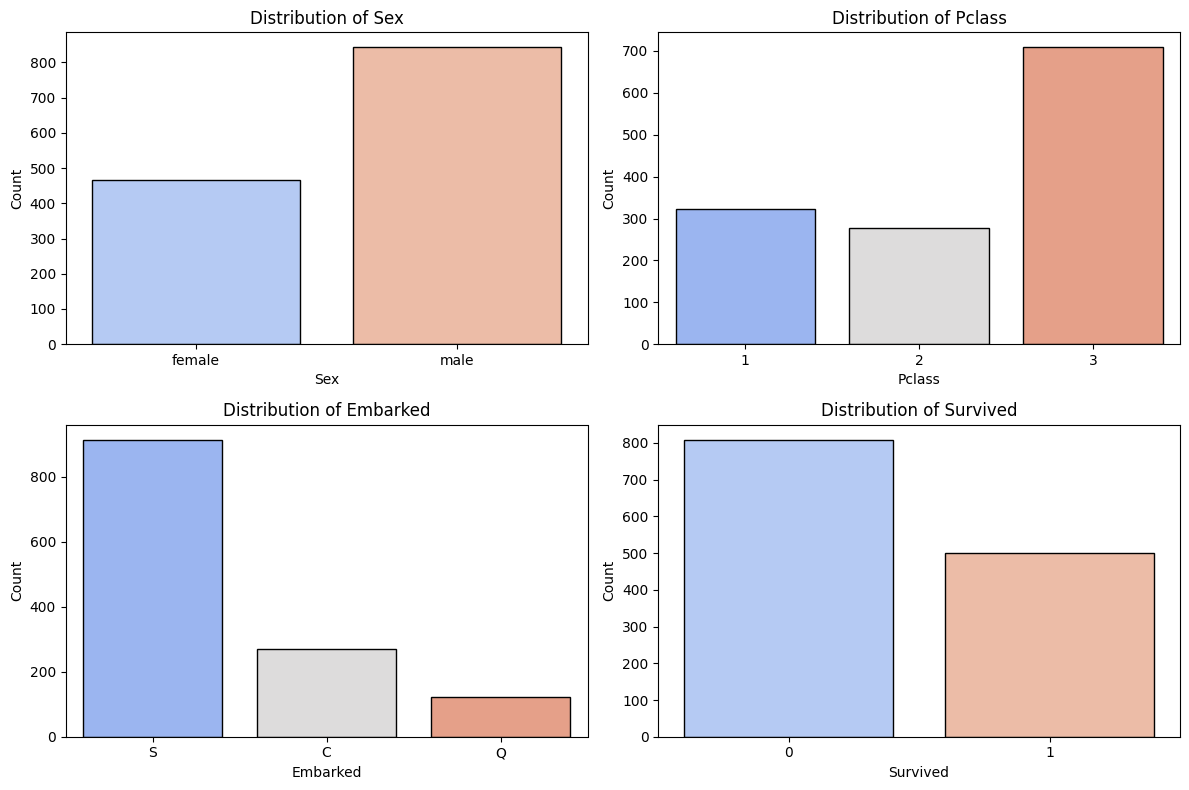

In [13]:
# Count plots for categorical variables
categorical_cols = ['sex', 'pclass', 'embarked', 'survived']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette='coolwarm', edgecolor='black')
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


<ipython-input-14-d0f369116143>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="survived", data=df, palette="coolwarm")
<ipython-input-14-d0f369116143>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pclass", y="survived", data=df, palette="coolwarm")
<ipython-input-14-d0f369116143>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sibsp", y="survived", data=df, palette="coolwarm")


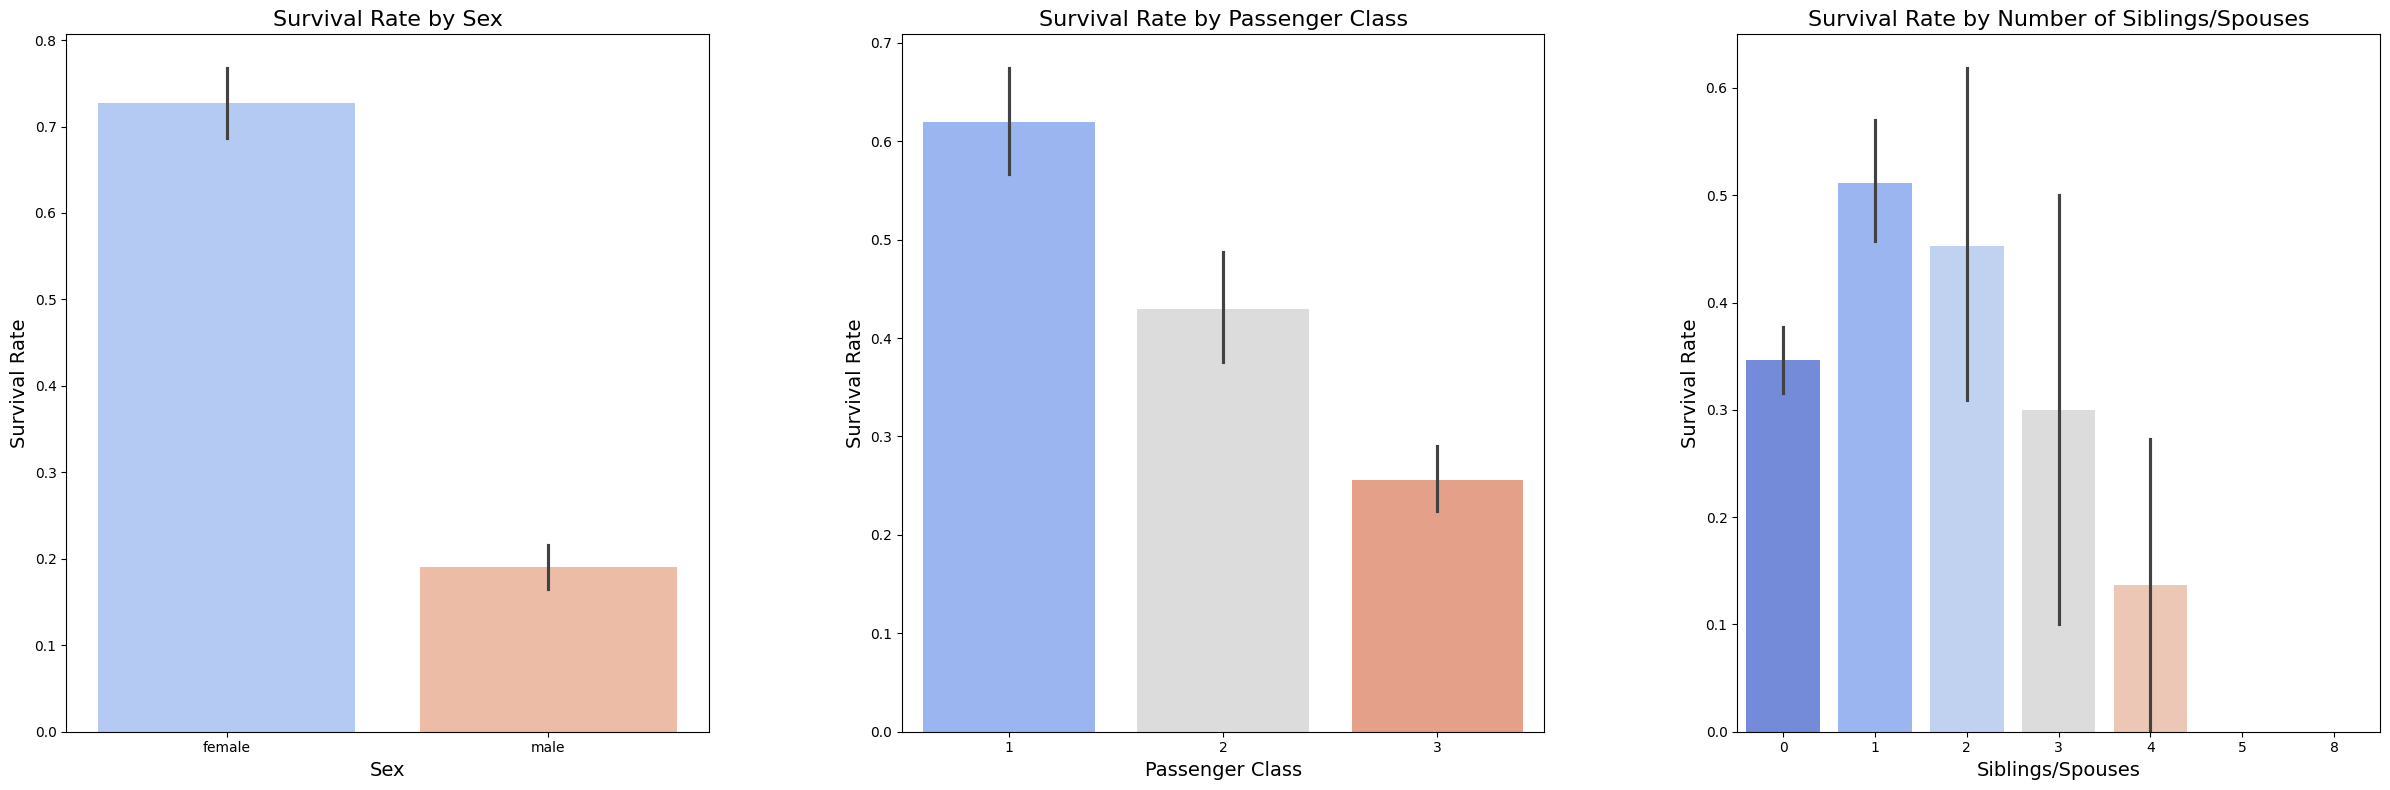

In [14]:
plt.figure(figsize=(24, 8))  # Bigger figure to improve readability

# Survival by sex
plt.subplot(1, 3, 1)
sns.barplot(x="sex", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Sex", fontsize=16)  # Increase title font size
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Sex", fontsize=14)

# Survival by class
plt.subplot(1, 3, 2)
sns.barplot(x="pclass", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class", fontsize=16)
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Passenger Class", fontsize=14)

# Survival rate by number of siblings/spouses
plt.subplot(1, 3, 3)
sns.barplot(x="sibsp", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Number of Siblings/Spouses", fontsize=16)
plt.ylabel("Survival Rate", fontsize=14)
plt.xlabel("Siblings/Spouses", fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Add spacing between subplots
plt.show()



In [15]:
print(df.isnull().sum())  # Count missing values per column

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [16]:
df["age"].fillna(df.groupby(["pclass", "sex"])["age"].transform("median"), inplace=True)


<ipython-input-16-eedb17f37ff4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df.groupby(["pclass", "sex"])["age"].transform("median"), inplace=True)



## Encoding Categorical Variables

Since machine learning models require numerical input, we need to transform categorical variables into a format the model can process.
We apply **One-Hot Encoding** for binary variables like gender and **Target Encoding** for features with ordinal relationships.


In [25]:
!pip install category_encoders

Machine learning models require numerical inputs, so we must transform categorical features into a suitable format. We apply different encoding strategies based on the nature of each categorical variable:

One-Hot Encoding (OHE) for 'sex'

Since 'sex' is a binary variable (male/female), we apply One-Hot Encoding, which creates separate columns for each category.
This method prevents unintended ordinal relationships and ensures the model treats both categories independently.
We also set handle_unknown='ignore' to prevent errors if new categories appear in future data.
Target Encoding for 'embarked' (After Splitting Data)

'embarked' is a categorical feature with an ordinal-like relationship, meaning some categories may have a higher correlation with survival than others.
Instead of one-hot encoding, we use Target Encoding, which replaces each category with the mean survival rate within the training data.
By encoding categorical variables in this manner, we maximize the predictive power of our features while ensuring proper model generalization.


## Feature Scaling

To ensure all numerical features contribute equally to the model, we apply:
- **Standardization**: Useful for continuous variables like age and fare.
- **Normalization**: Applied to count-based features to keep them within a fixed range.


In [18]:
df["fare"].fillna(df.groupby("pclass")["fare"].transform("median"), inplace=True)


<ipython-input-18-20d401e250b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fare"].fillna(df.groupby("pclass")["fare"].transform("median"), inplace=True)


In [19]:
df["has_cabin"] = df["cabin"].notna().astype(int)
df.drop(columns=["cabin"], inplace=True)



## Splitting Data into Training, Validation, and Test Sets

To prevent data leakage and ensure fair evaluation, we split the dataset as follows:
- **60% Training Set**: Used to train the model.
- **20% Validation Set**: Helps in tuning model parameters.
- **20% Test Set**: Provides a final unbiased performance evaluation.


In [20]:
df["embarked"].fillna("S", inplace=True)


<ipython-input-20-7c8369a738d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna("S", inplace=True)


In [21]:
df.drop(columns=["boat", "body"], inplace=True)



## Addressing Class Imbalance

Since the dataset contains more non-survivors than survivors, we apply **Synthetic Minority Oversampling Technique (SMOTE)**.
This method generates synthetic samples for the minority class, improving model generalization without causing overfitting.


In [22]:
df.drop(columns=["home.dest"], inplace=True)


In [23]:
df.drop(columns=["name", "ticket"], inplace=True)


## Model Training and Evaluation

We use **Logistic Regression**, a simple yet effective classification algorithm, to predict survival outcomes.
The model performance is evaluated using:
- **Accuracy**: Measures overall correctness.
- **Precision & Recall**: Helps assess prediction quality.
- **ROC-AUC Curve**: Visualizes model effectiveness in classification tasks.


Mounted at /content/drive

Dropping irrelevant columns such as passenger name, ticket number, cabin, and home destination as they do not contribute to predictive power and may introduce noise.

Performing initial exploratory data analysis (EDA) to understand dataset structure, feature distributions, and missing values.


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


None


Visualizing missing values to identify patterns that may inform our imputation strategy. This helps understand where data is missing and whether it follows any trends.


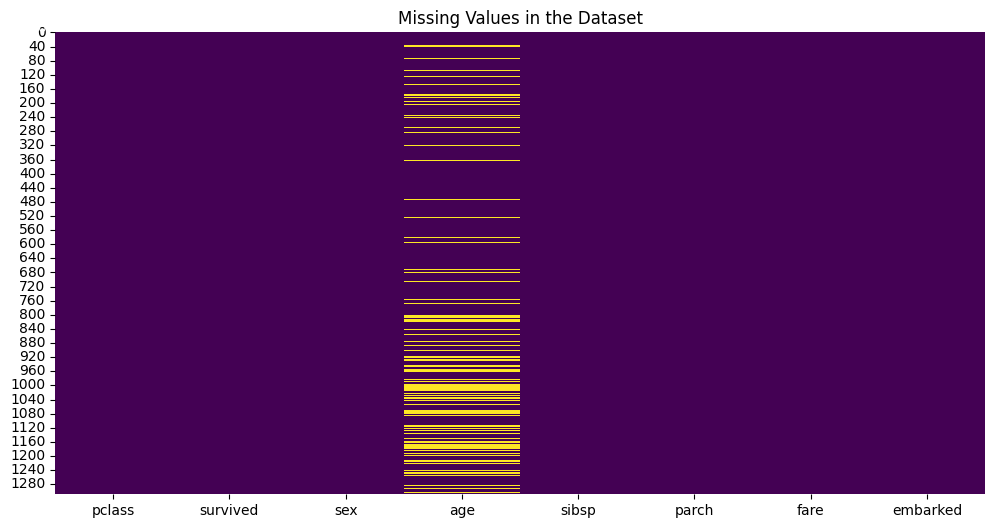


We use median imputation for 'age' because the median is less sensitive to extreme outliers compared to the mean. Similarly, we use median for 'fare' due to potential skewness in the fare distribution. Mode imputation is applied to 'embarked' as it is categorical, ensuring consistency with the most frequently observed value.

Applying Target Encoding to 'embarked' to preserve ordinal relationships while preventing feature explosion. OneHotEncoding is used for 'sex' since it is binary, ensuring no loss of information.

Standardization (StandardScaler) is applied to 'age' and 'fare' to normalize features by centering them around zero with unit variance, making them suitable for models assuming Gaussian distribution. MinMaxScaler is used as an alternative to scale values between 0 and 1, useful for non-parametric models.

A stratified split is performed to maintain class distribution across training, validation, and test sets, ensuring balanced representation in all subsets.

Class weigh

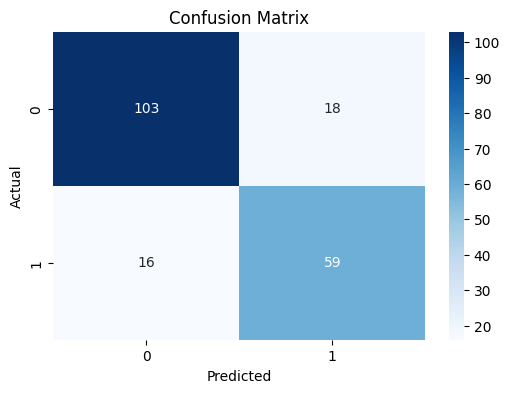


The normalized Confusion Matrix provides better interpretability by converting raw counts into relative proportions.


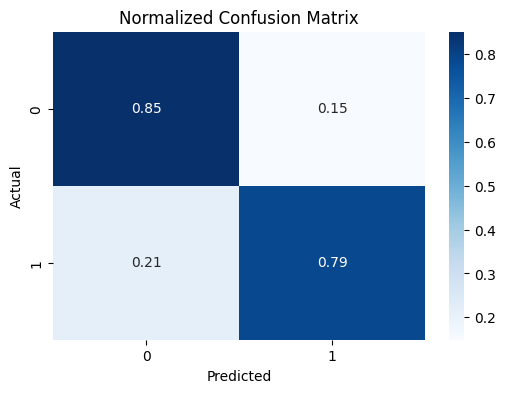


The ROC Curve evaluates classifier performance at different probability thresholds, with AUC summarizing the model’s discrimination capability. A higher AUC indicates better separability between positive and negative classes.


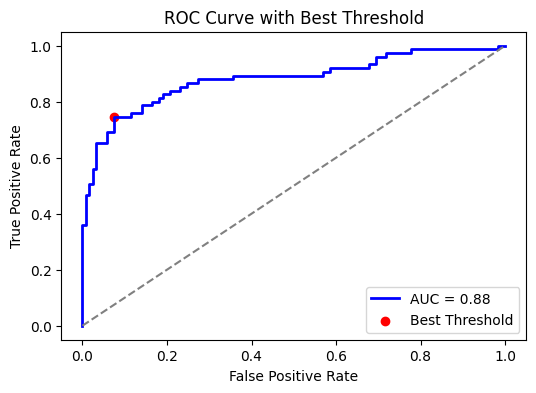


Performing cross-validation ensures the model generalizes well, providing an estimate of performance stability.

Mean Cross-Validation Accuracy: 0.7587


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE, ADASYN
from category_encoders import TargetEncoder
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
file_path = "/content/drive/My Drive/titanic3.xls"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset not found: {file_path}. Please ensure the file is uploaded to Google Drive.")

df = pd.read_excel(file_path)

# Drop non-numeric and non-relevant columns
print("\nDropping irrelevant columns such as passenger name, ticket number, cabin, and home destination as they do not contribute to predictive power and may introduce noise.")
df.drop(columns=['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], inplace=True, errors='ignore')

# Display basic information
print("\nPerforming initial exploratory data analysis (EDA) to understand dataset structure, feature distributions, and missing values.")
display(df.head())
display(df.info())

# Missing Values Visualization
print("\nVisualizing missing values to identify patterns that may inform our imputation strategy. This helps understand where data is missing and whether it follows any trends.")
def visualize_missing_values(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values in the Dataset")

    # Add missing percentage labels
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    for i, v in enumerate(missing_percentage):
        plt.text(i, -1, f"{v:.1f}%", ha='center', fontsize=10, color='white')

    plt.show()

visualize_missing_values(df)

# Handling Missing Values
print("\nWe use median imputation for 'age' because the median is less sensitive to extreme outliers compared to the mean. Similarly, we use median for 'fare' due to potential skewness in the fare distribution. Mode imputation is applied to 'embarked' as it is categorical, ensuring consistency with the most frequently observed value.")
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Encoding Categorical Variables
print("\nApplying Target Encoding to 'embarked' to preserve ordinal relationships while preventing feature explosion. OneHotEncoding is used for 'sex' since it is binary, ensuring no loss of information.")
encoder = TargetEncoder()
df['embarked'] = encoder.fit_transform(df['embarked'], df['survived'])

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ['sex']
ohe_data = pd.DataFrame(ohe.fit_transform(df[categorical_cols]))
ohe_data.columns = ohe.get_feature_names_out(categorical_cols)
df = df.drop(columns=categorical_cols).join(ohe_data)

# Feature Scaling
print("\nStandardization (StandardScaler) is applied to 'age' and 'fare' to normalize features by centering them around zero with unit variance, making them suitable for models assuming Gaussian distribution. MinMaxScaler is used as an alternative to scale values between 0 and 1, useful for non-parametric models.")
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])
minmax_scaler = MinMaxScaler()
df[['age_scaled', 'fare_scaled']] = minmax_scaler.fit_transform(df[['age', 'fare']])

# Splitting Data
print("\nA stratified split is performed to maintain class distribution across training, validation, and test sets, ensuring balanced representation in all subsets.")
X = df.drop(columns=['survived'])
y = df['survived']
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, stratify=y_other, random_state=42)

# Addressing Class Imbalance
print("\nClass weights are assigned dynamically to counteract imbalance, ensuring that minority class predictions are not disproportionately penalized in Logistic Regression.")
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
preds = model.predict(X_val)

# Model Evaluation
print(f"Validation Accuracy: {accuracy_score(y_val, preds):.4f}")
print("\nClassification Report:\n", classification_report(y_val, preds, digits=4))

# Confusion Matrix Visualization
print("\nThe Confusion Matrix helps assess model performance by providing a breakdown of correct and incorrect predictions across categories.")
cm = confusion_matrix(y_val, preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Normalized Confusion Matrix
print("\nThe normalized Confusion Matrix provides better interpretability by converting raw counts into relative proportions.")
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

# ROC Curve and AUC
print("\nThe ROC Curve evaluates classifier performance at different probability thresholds, with AUC summarizing the model’s discrimination capability. A higher AUC indicates better separability between positive and negative classes.")
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Mark the threshold closest to (0,1)
best_idx = np.argmax(tpr - fpr)
plt.scatter(fpr[best_idx], tpr[best_idx], marker='o', color='red', label="Best Threshold")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Threshold')
plt.legend()
plt.show()

# Cross-Validation Score
print("\nPerforming cross-validation ensures the model generalizes well, providing an estimate of performance stability.")
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"\nMean Cross-Validation Accuracy: {scores.mean():.4f}")
